# 16-825 Assignment 2: Single View to 3D

## 1. Exploring Loss Functions

### 1.1. Fitting a voxel grid (5 points)

|Ground Truth|Optimized|
|:-:|:-:|
|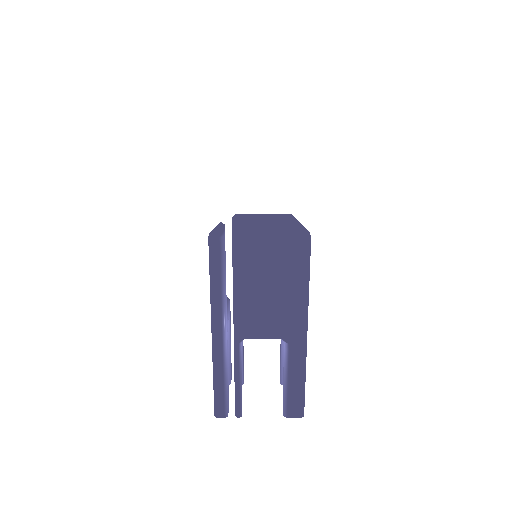|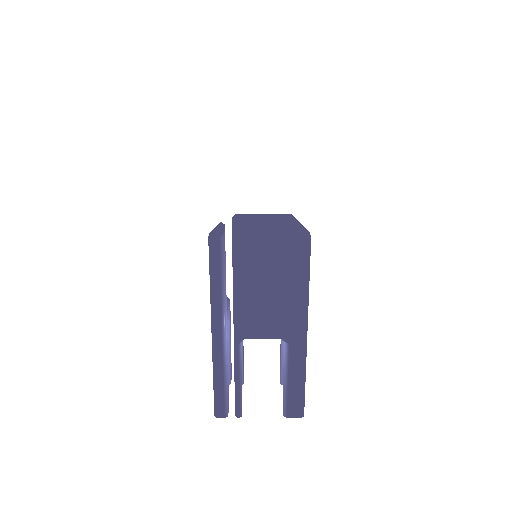|

### 1.2 Fitting a point cloud (10 points)

|Ground Truth|Optimized|
|:-:|:-:|
|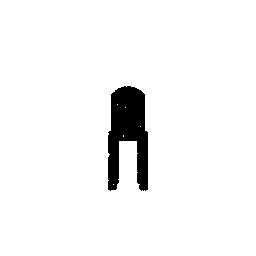|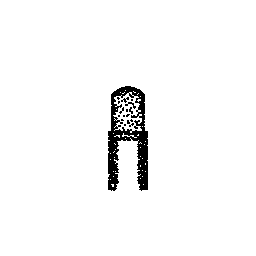|

### 1.3 Fitting a mesh (5 points)

|Ground Truth|Optimized|
|:-:|:-:|
|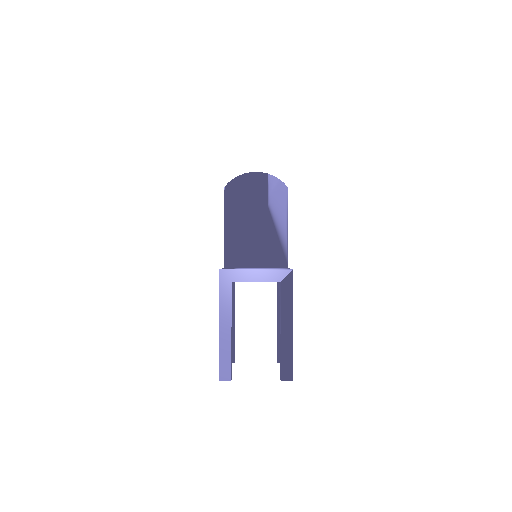|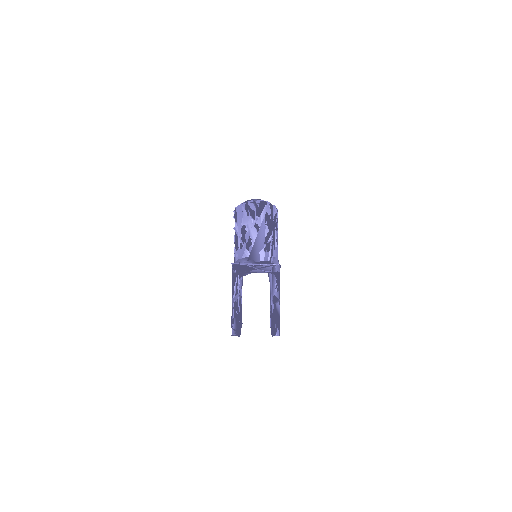|

## 2. Reconstructing 3D from single view

### 2.1. Image to voxel grid (20 points)

|Input RGB|Ground Truth Mesh|Predicted Mesh from Voxel|
|:-:|:-:|:-:|
|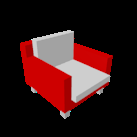|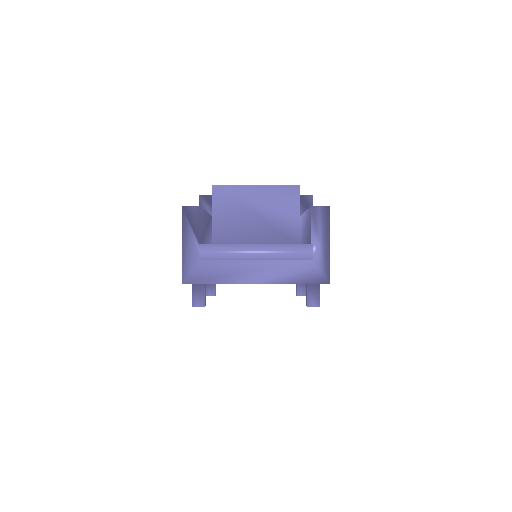|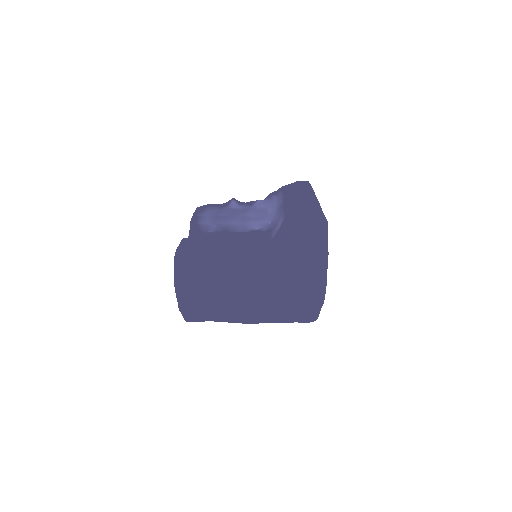|

|Input RGB|Ground Truth Mesh|Predicted Mesh from Voxel|
|:-:|:-:|:-:|
|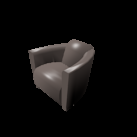|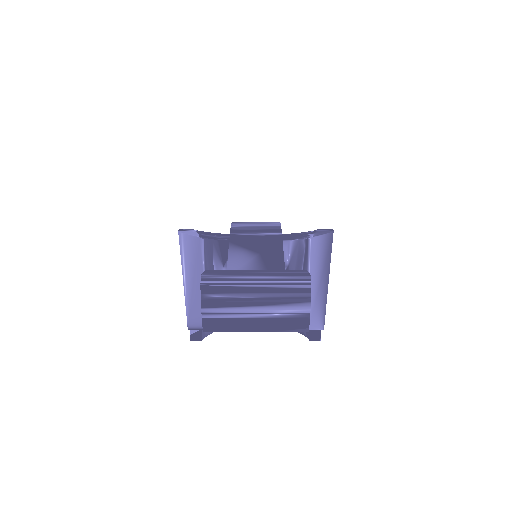|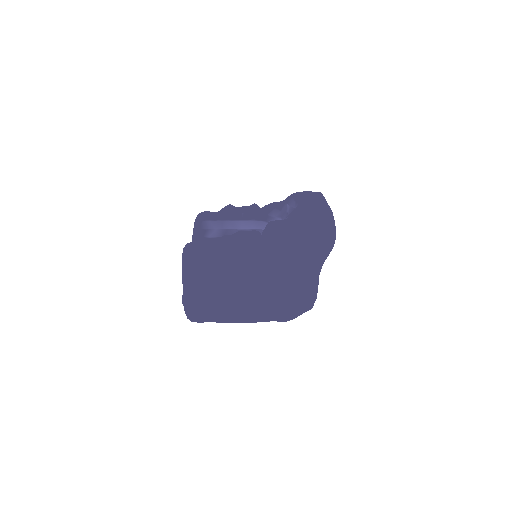|

|Input RGB|Ground Truth Mesh|Predicted Mesh from Voxel|
|:-:|:-:|:-:|
|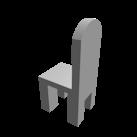|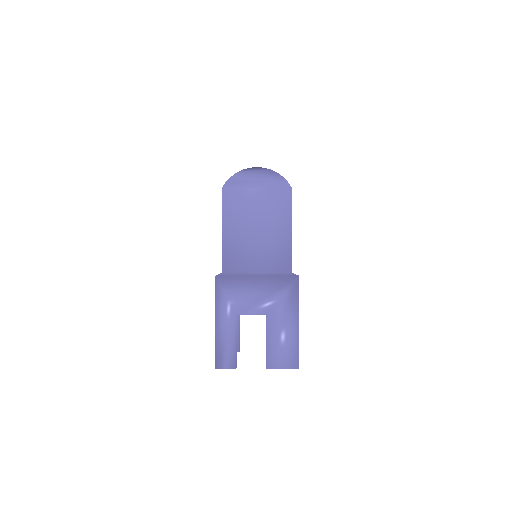|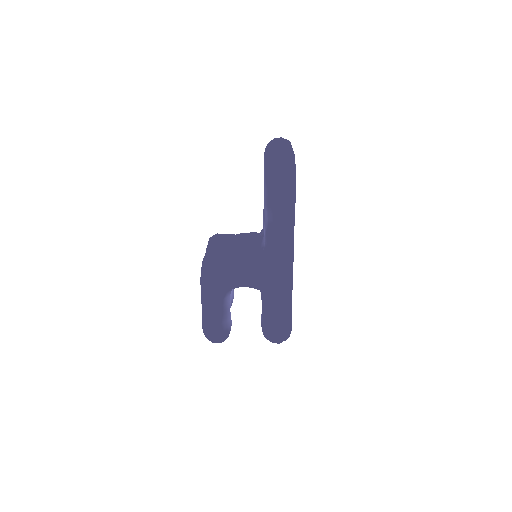|  
  
Used 3D convolutions with ReLU as activation functions in decoder network

### 2.2 Image to point cloud (20 points)

|Input RGB|Ground Truth Mesh|Predicted Point Cloud|
|:-:|:-:|:-:|
|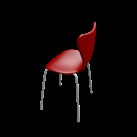|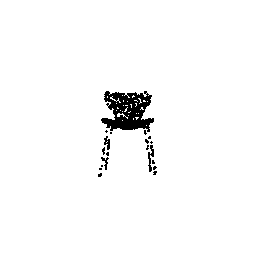|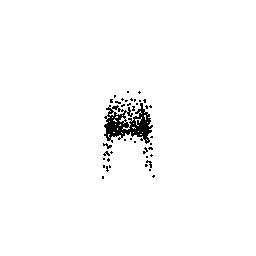|

|Input RGB|Ground Truth Mesh|Predicted Point Cloud|
|:-:|:-:|:-:|
|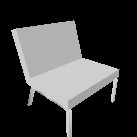|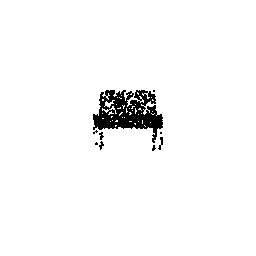|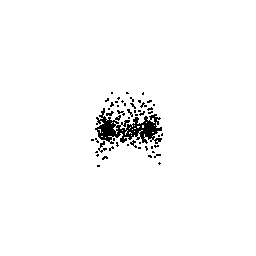|  

|Input RGB|Ground Truth Mesh|Predicted Point Cloud|
|:-:|:-:|:-:|
|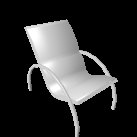|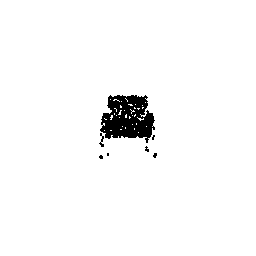|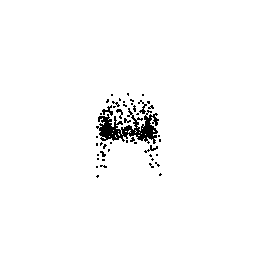|  
  
Used a simple MLP with ReLU as activation functions and 2 hidden linear layers

### 2.3 Image to mesh (20 points)

|Input RGB|Ground Truth Mesh|Predicted Mesh|
|:-:|:-:|:-:|
|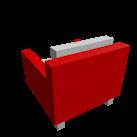|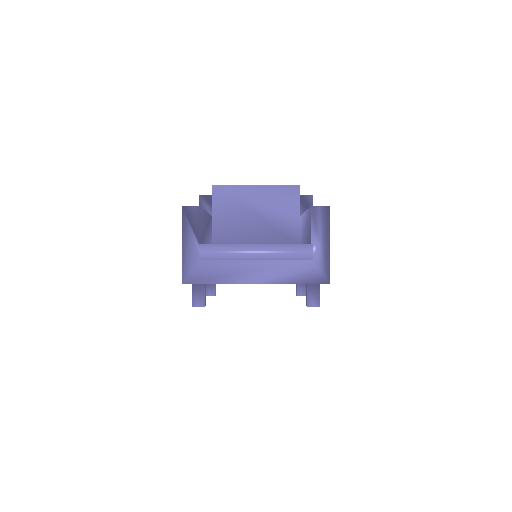|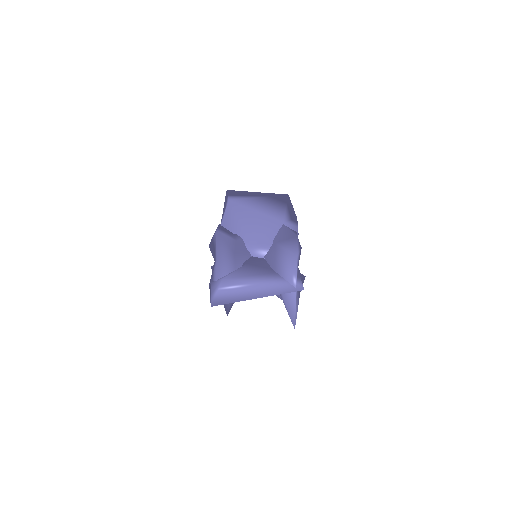|

|Input RGB|Ground Truth Mesh|Predicted Mesh|
|:-:|:-:|:-:|
|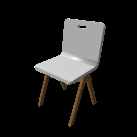|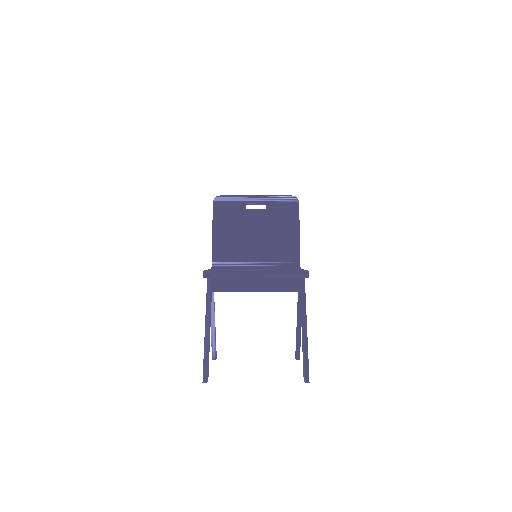|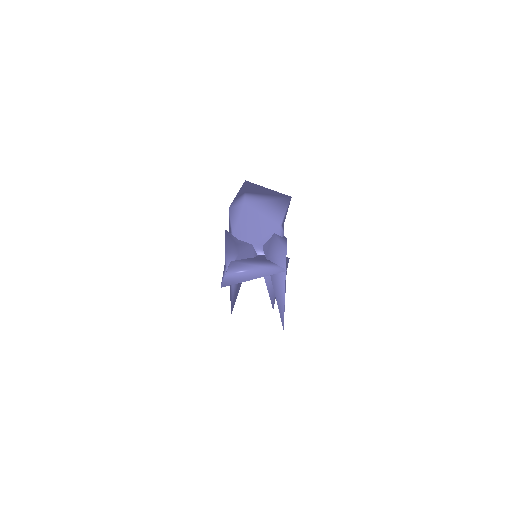|

|Input RGB|Ground Truth Mesh|Predicted Mesh|
|:-:|:-:|:-:|
|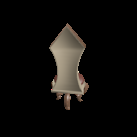|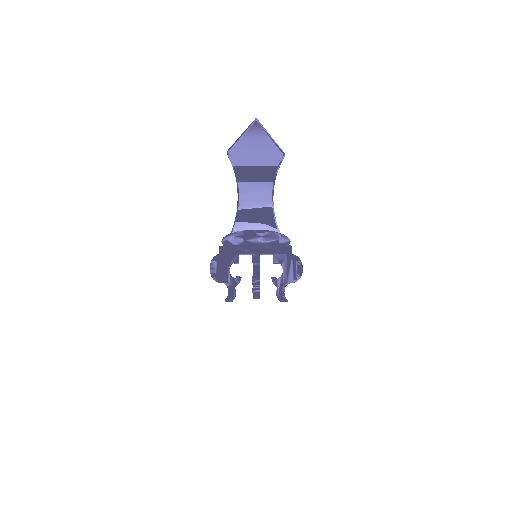|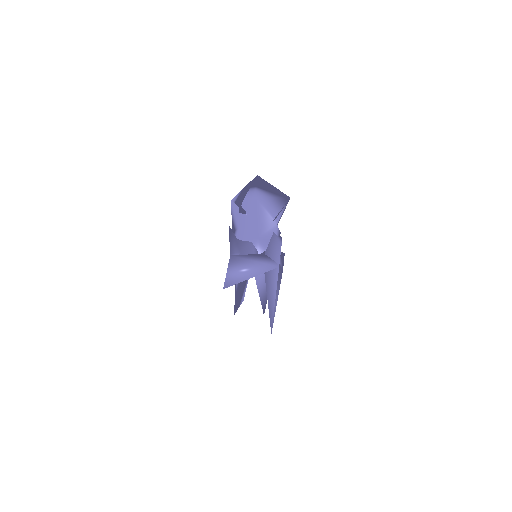|  
  
Experimented with a lot of MLPs. The performance didn't seem to improve too much with large and deeper MLPs.

### 2.4 Quantitative comparisions(10 points)

Avg F1@0.05:  
Voxel -> 41.957  
Point Cloud -> 73.867  
Mesh -> 70.181

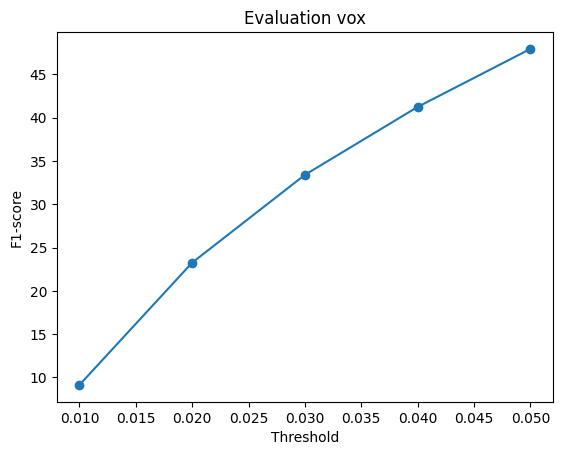
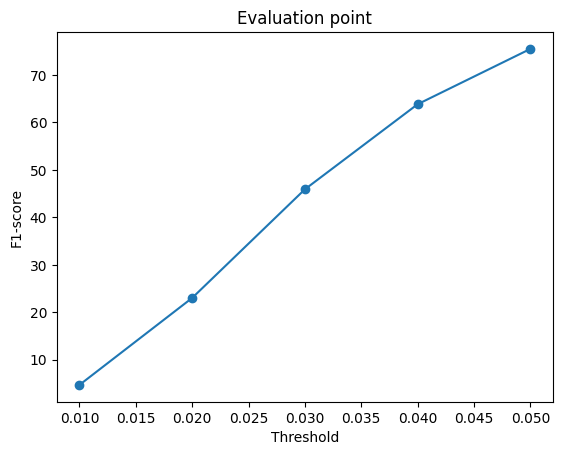
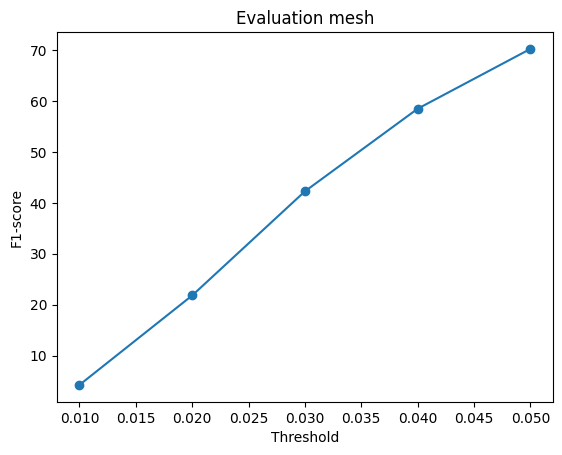

F1 score represents the inherent characteristics of the model, how it forms, how it rasterizes etc.

F1 score of voxel model is the least despite having 3D convolutions in the network. One might expect that the model would have some spatial reasoning from the traiing process, which is true. One thing to note is that the transformation between voxel prediction and loaded mesh lowers the F1 score. 

F1 for the Pointcloud model is the highest. A very strong intuition behind this is that the pointclouds have no notion of connectivity, so each prediction (point) is independent of every other prediction. So even if some of the predictions go wrong, it doesn't affect the overall structure.

The high F1 score of mesh seems unusual at first glance given the renderings of mesh. The number of points, the args.n_points argument was set to 5000. But in ground truth, the number is obviously much more than this. That might be the reason for the loss and hence F1 score to not be much informative. 

### 2.5 Analyse effects of hyperparms variations (10 points)

I experimented with w_smooth hyperparameter in the mesh model. From the results below, as w_smooth is varied from 0.1 to 0.8, the mesh becomes smoother and smoother. But for the objects that need sharp edges (like most of the real world objects), adding too much smoothness (high w_smooth) is not useful.

| w_smooth | 0.1 | 0.4 | 0.8 |
|-------------|:--------:|:--------:|:--------:|
| Render 1 | 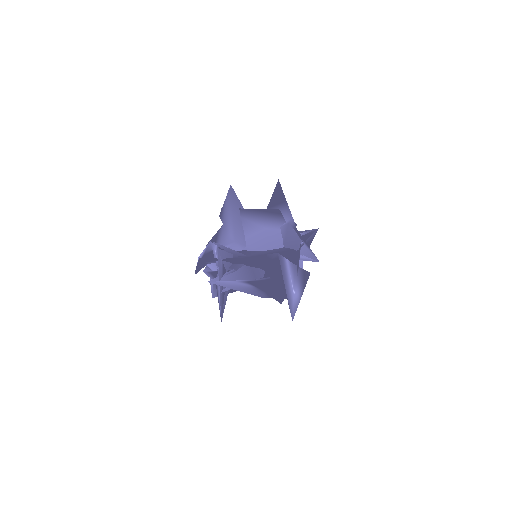 | 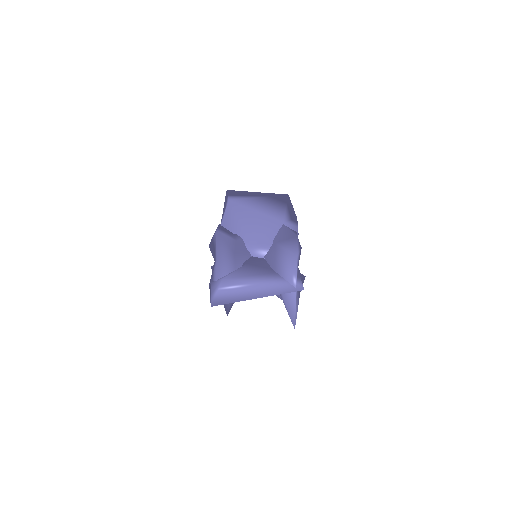 | 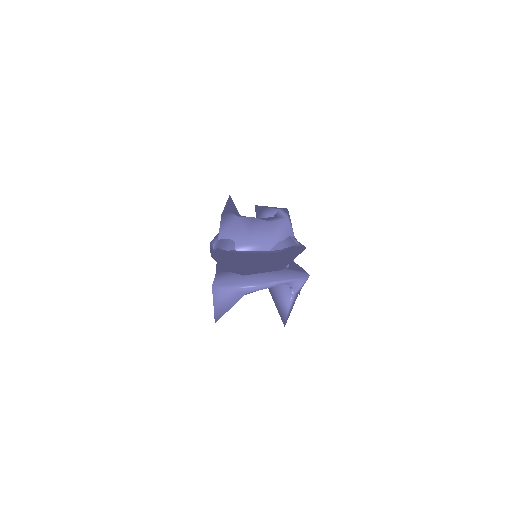 |
| Render 2 | 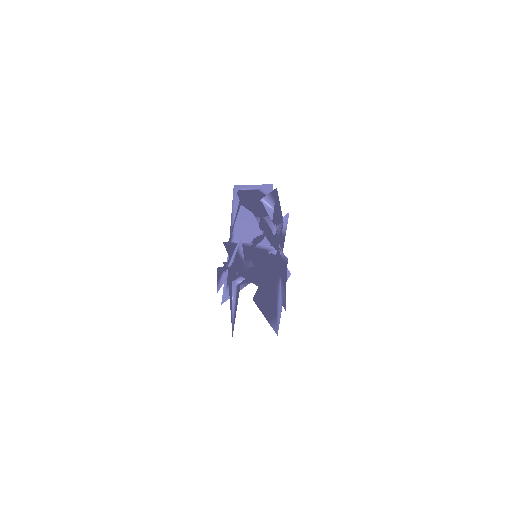 | 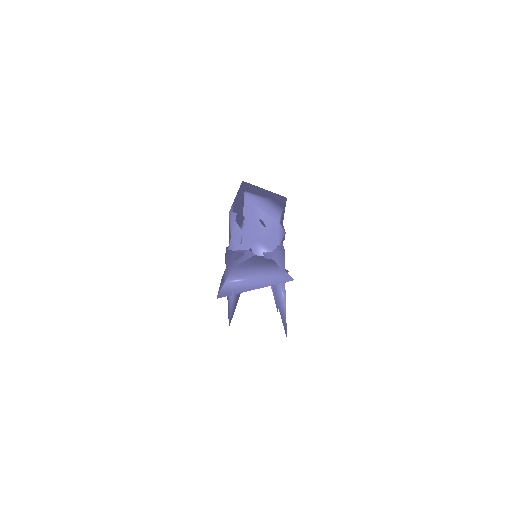 | 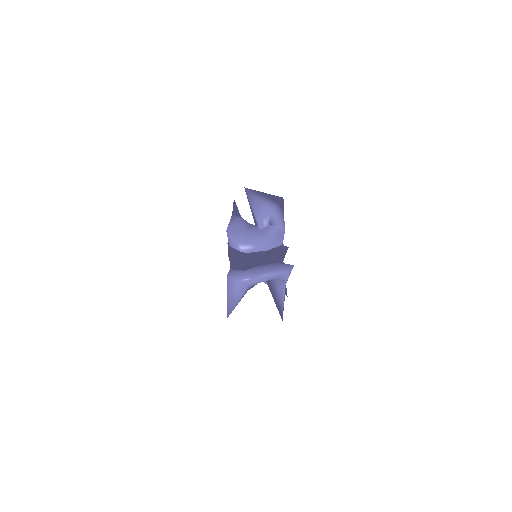 |
| Render 3 | 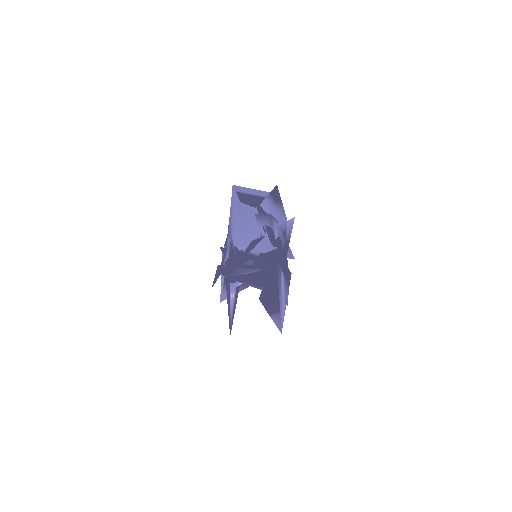 | 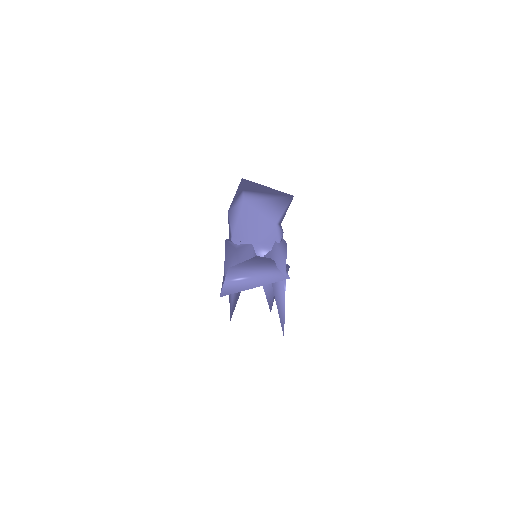 | 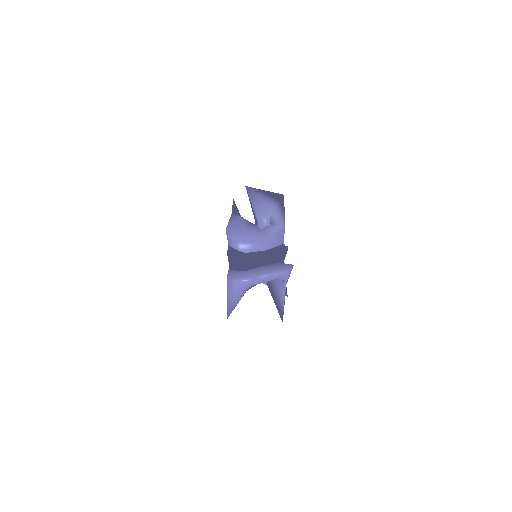 |

### 2.6 Interpret your model (15 points)

To visualize what exactly is going on in the network, I visualized the activation from the last layer. I used GradCAM (Gradient-weighted Class Activation Mapping) to implement this (https://arxiv.org/abs/1610.02391). So essentially, it informs what area of the image the network is focussing on to make the desired result possible.  
From the following visualizations, it can be seen that for the first two, the network seems to be focussing on roughly the correct spots, the seats, and the resulting mesh also reflects that. But in the 3rd visualization, the network is focussing away from the actual object, hence the poor result.

| Activated Image | GT Mesh | Predicted Mesh from Voxel |
|:--------:|:--------:|:--------:|
| 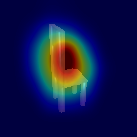 | 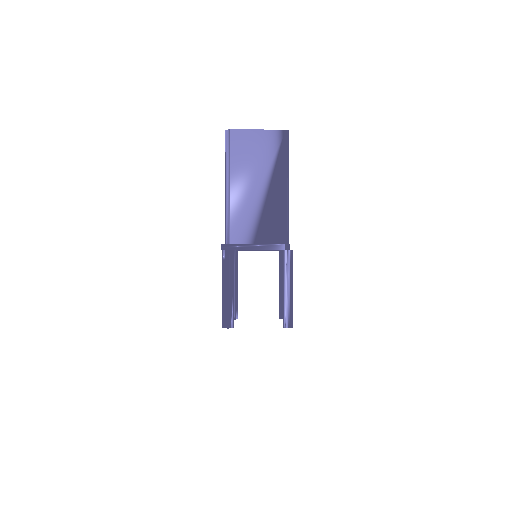 | 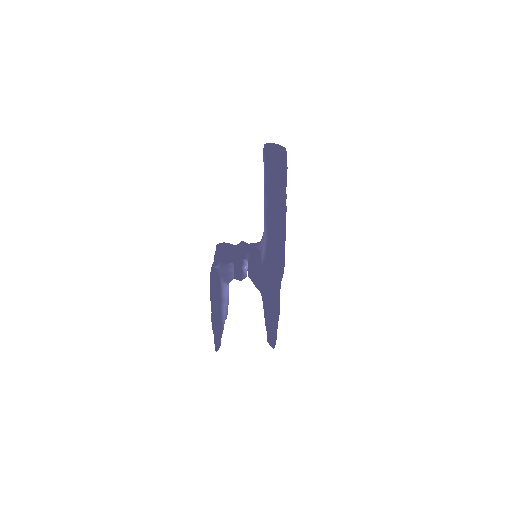 |
| 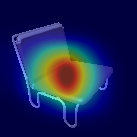 | 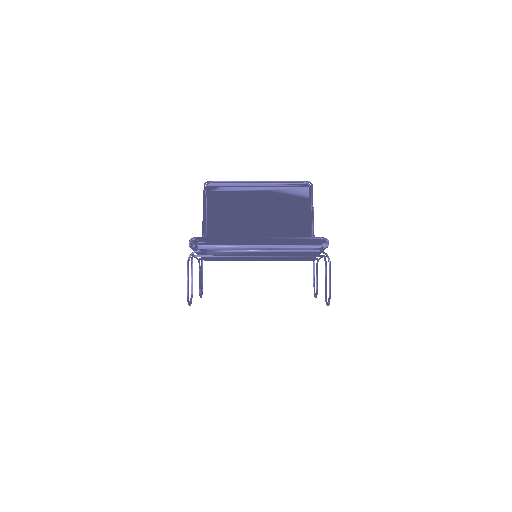 | 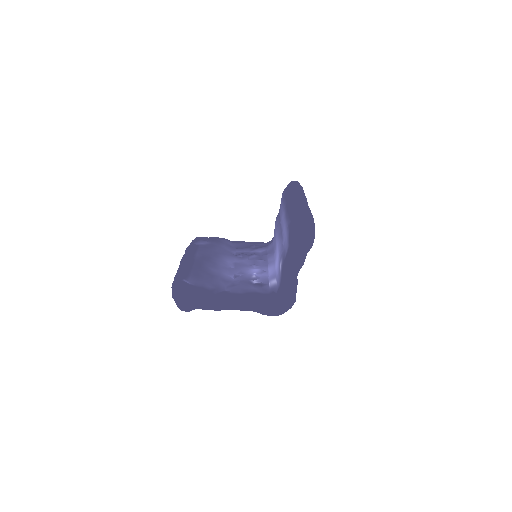 |
| 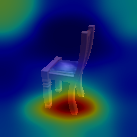 | 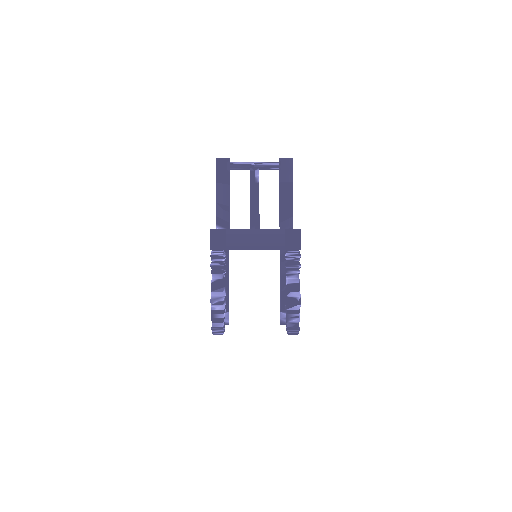 | 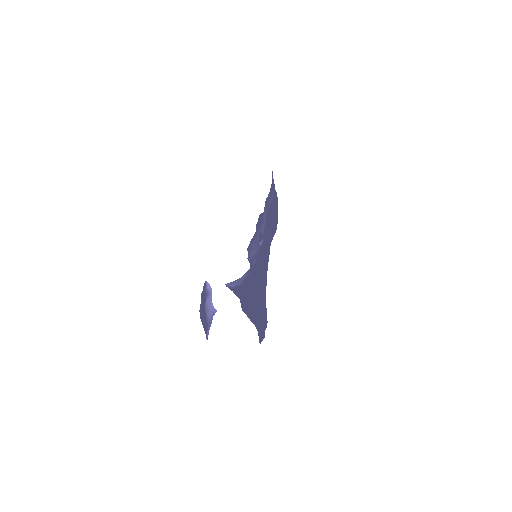 |

## 3. Exploring other architectures / datasets. (Choose at least one! More than one is extra credit)

### 3.2 Parametric network (10 points)

|Input RGB|Ground Truth Point Cloud|Predicted Point Cloud|
|:-:|:-:|:-:|
| 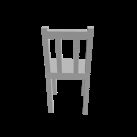 | 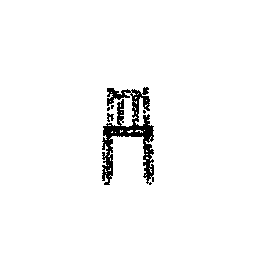 | 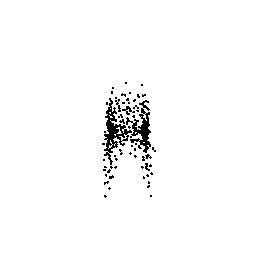 |
| 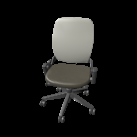 | 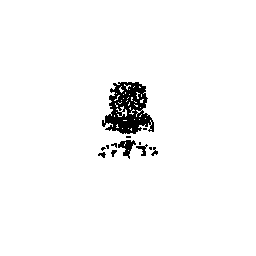 | 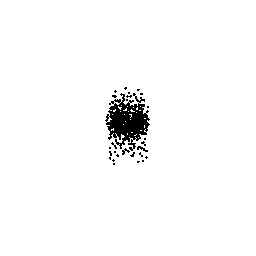 |
| 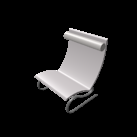 | 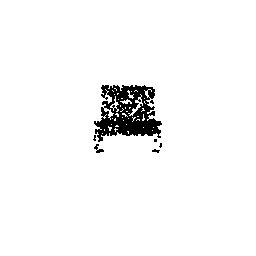 | 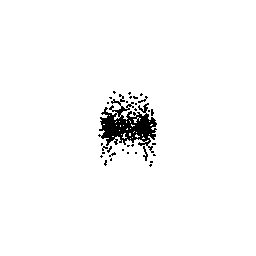 | 

For parametric network, I referred to AtlasNet (https://arxiv.org/pdf/1802.05384.pdf). I augmented the fully connected layers with some skip connections.